In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
%matplotlib inline

In [35]:
# load the advertising data set
df = pd.read_csv("D://M_AI//Machine Learning//Demo Datasets//Lesson 4//Advertising.csv",index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [36]:
df.columns = ['TV','Radio','NewsPaper','Sales']

Text(0, 0.5, 'Sales')

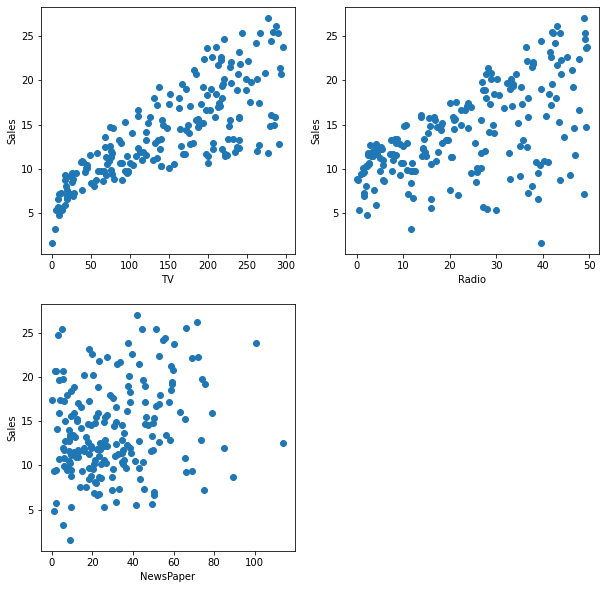

In [37]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.scatter(df.TV,df.Sales)
plt.xlabel('TV')
plt.ylabel('Sales')

plt.subplot(2,2,2)
plt.scatter(df.Radio,df.Sales)
plt.xlabel('Radio')
plt.ylabel('Sales')

plt.subplot(2,2,3)
plt.scatter(df.NewsPaper,df.Sales)
plt.xlabel('NewsPaper')
plt.ylabel('Sales')

In [38]:
fea_col1 = ['TV']
x = df[fea_col1]
y = df.Sales

In [39]:
from sklearn.linear_model import LinearRegression
liR = LinearRegression()
liR.fit(x,y)

print(liR.intercept_)
print(liR.coef_)

7.032593549127693
[0.04753664]


In [40]:
x_new = pd.DataFrame({'TV':[50,12,300]})
x_new.head()

,TV
0,50
1,12
2,300


In [41]:
pred = liR.predict(x_new)

Text(0, 0.5, 'Sales')

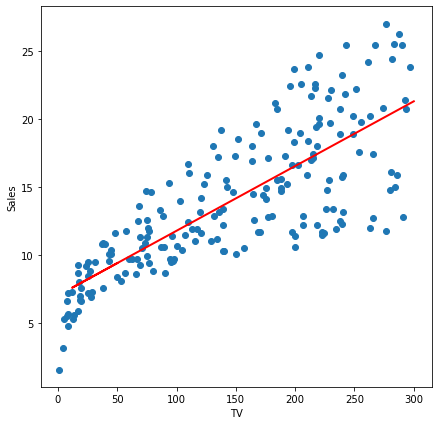

In [42]:
plt.figure(figsize=(7,7))
plt.scatter(df.TV,df.Sales)
plt.plot(x_new,pred,'r',linewidth=2)
plt.xlabel('TV')
plt.ylabel('Sales')


In [43]:
import statsmodels.formula.api as smf
liR = smf.ols(formula ='Sales~TV',data=df).fit()

In [44]:
liR.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [45]:
liR.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [46]:
liR.rsquared

0.611875050850071

In [47]:
# multilinear Regression
fea_cols = ['TV','Radio','NewsPaper']
X = df[fea_cols]
y = df.Sales

In [48]:
from sklearn.model_selection import train_test_split
X_Train,X_test,y_Train,y_test =  train_test_split(X,y,test_size=0.3,random_state=50)
liR = LinearRegression()
liR.fit(X,y)

print(liR.intercept_)
print(liR.coef_)

2.9388893694594085
[ 0.04576465  0.18853002 -0.00103749]


In [49]:
liR = LinearRegression()
liR.fit(X_Train,y_Train)

print(liR.intercept_)
print(liR.coef_)

2.7094899086915714
[0.0475501  0.18088015 0.00629805]


In [51]:
predictions = liR.predict(X_test)
print(sqrt(mean_squared_error(y_test,predictions)))

1.619497731011501


In [54]:
liR = smf.ols(formula ='Sales~TV + Radio + NewsPaper',data=df).fit()
liR.conf_int()

,0,1
Intercept,2.323762,3.554016
TV,0.043014,0.048516
Radio,0.171547,0.205513
NewsPaper,-0.012616,0.010541


In [56]:
liR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 23 Sep 2020   Prob (F-statistic):           1.58e-96
Time:                        13:09:14   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
NewsPaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
np.random.seed(12345)
nums = np.random.rand(len(df))
mask_large = nums > 0.5

df['Size'] = 'small'
df.loc[mask_large,'Size'] = 'large'
df.head()


,TV,Radio,NewsPaper,Sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


In [60]:
df['Islarge'] = df.Size.map({'small':0,'large':'1'})
df.head()

,TV,Radio,NewsPaper,Sales,Size,Islarge
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


In [61]:
fea_cols = ['TV','Radio','NewsPaper','Islarge']
X = df[fea_cols]
y = df.Sales

liR = LinearRegression()
liR.fit(X,y)

print(liR.intercept_)
print(liR.coef_)

2.911701328256857
[ 0.04571982  0.18872814 -0.00109768  0.05742385]
